In [1]:
import pandas as pd
df_cosmetics=pd.read_csv('df_cosmetics.csv')
df_hospitality=pd.read_csv('df_hospitality.csv')

#Clustering df_cosmetics

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_cosmetics['caption'].astype(str))

In [3]:
df_cosmetics['SUB-CATEGORY'].unique() 

array(['beauty clinic', 'beauty products', 'dental practice'],
      dtype=object)

In [4]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [5]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [6]:
df_cosmetics['cluster'] = clusters
df_cosmetics['x0'] = x0
df_cosmetics['x1'] = x1

cluster_map_cosmetics = {0:'beauty clinic', 1:'beauty products', 2:'dental practice'} # mapping found through get_top_keywords
df_cosmetics['cluster'] = df_cosmetics['cluster'].map(cluster_map_cosmetics);

In [7]:
import numpy as np
def get_top_keywords(n_terms, df):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20, df_cosmetics)


Cluster 0
year,good,love,bio,today,team,link,time,one,get,new,thank,patients,it,happy,us,the,day,skin,we

Cluster 1
forever,forget,forgetting,forgot,forgotten,form,forma,formal,format,formation,formatk,forme,formed,former,forming,forms,formula,formular,foreign,nan

Cluster 2
augmentation,dr,the,treatment,breast,please,contact,info,procedure,co,us,patient,east,uk,com,results,www,book,consultation,surgery


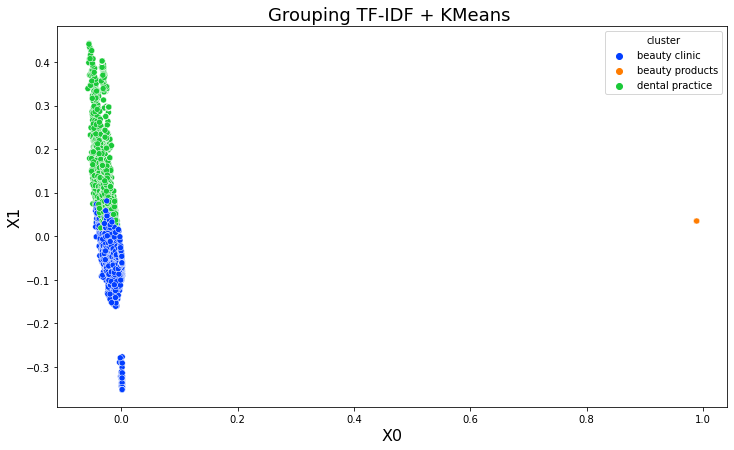

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_cosmetics, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('cosmetics_clustering.png')

plt.show()

#Clustering df_hospitality

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_hospitality['caption'].astype(str))

In [10]:
df_hospitality['SUB-CATEGORY'].unique() #21

array(['restaurant', 'hotel', 'pub', 'doughnut shop', 'bakery', 'café',
       'bar & grill', 'bar & kitchen', 'breakfast & brunch restaurant',
       'streetfood market', 'bar', 'pastry shop', 'chocolate shop',
       'brewery', 'wine bar & shop', 'coffee / food shop', 'cocktail bar',
       'ice cream shop', 'serviced apartments', 'pub & restaurant',
       'fast food chain', 'empanadas store / delivery', 'wine bar',
       'dessert shop',
       'restaurants / lifestyle shop / deli / plant nursery',
       'food delivery', 'beer garden'], dtype=object)

In [11]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=21, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
df_hospitality['cluster'] = clusters
df_hospitality['x0'] = x0
df_hospitality['x1'] = x1

cluster_map_hospitality = {0: 'restaurant', 1:'hotel', 2:'pub', 3:'doughnut shop', 4:'bakery', 5:'café',
       6:'bar & grill', 7:'bar & kitchen', 8:'breakfast & brunch restaurant',
       9:'streetfood market', 10:'bar', 11:'pastry shop', 12:'chocolate shop',
       13:'brewery', 14:'wine bar & shop', 15:'coffee / food shop', 16:'cocktail bar',
       17:'ice cream shop', 18:'serviced apartments', 19:'pub & restaurant',
       20:'fast food chain'} # mapping found through get_top_keywords
df_hospitality['cluster'] = df_hospitality['cluster'].map(cluster_map_hospitality);

In [ ]:

get_top_keywords(20, df_hospitality)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(20, 10))
# set title
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_hospitality, x='x0', y='x1', hue='cluster', palette="viridis")
plt.savefig('hospitality_clustering.png')

plt.show()